In [1]:
import pickle
import pandas as pd
import numpy as np
import cv2

In [2]:
data = pickle.load(open('cleaned_training.p', 'rb'))

In [3]:
from data_functions import create_training_data

In [4]:
X, Y_root, Y_vowel, Y_consonant = create_training_data(data)

In [5]:
from keras.models import Model, load_model, Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
dense = Dense(512, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

Using TensorFlow backend.


In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [7]:
model.input

<tf.Tensor 'input_1:0' shape=(None, 64, 64, 1) dtype=float32>

In [8]:
model.layers

In [9]:
# def add_output(model):
# #     new_model = Sequential()
# #     for layer in model.layers:
# #         new_model.add(layer)
#     last_layer = new_model.layers[-4]
#     root = Dense(168, activation = 'softmax')(last_layer)
#     vowel = Dense(11, activation = 'softmax')(last_layer)
#     consonant = Dense(7, activation = 'softmax')(last_layer)
#     new_model = Model(inputs = model.input, outputs = model.output)
#     return new_model

In [10]:
model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X, Y_root, Y_vowel, Y_consonant, test_size=0.05, random_state=42)

In [12]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
                epochs = 16,
                batch_size= 256,
                validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/16
171718/171718 [==============================] - 102s 595us/step - loss: 6.1266 - dense_3_loss: 4.1290 - dense_4_loss: 1.0987 - dense_5_loss: 0.8985 - dense_3_accuracy: 0.1054 - dense_4_accuracy: 0.6435 - dense_5_accuracy: 0.7085 - val_loss: 4.9315 - val_dense_3_loss: 3.4108 - val_dense_4_loss: 0.8215 - val_dense_5_loss: 0.6989 - val_dense_3_accuracy: 0.1926 - val_dense_4_accuracy: 0.7101 - val_dense_5_accuracy: 0.7406
Epoch 2/16
171718/171718 [==============================] - 99s 574us/step - loss: 4.1761 - dense_3_loss: 3.0077 - dense_4_loss: 0.5989 - dense_5_loss: 0.5693 - dense_3_accuracy: 0.2533 - dense_4_accuracy: 0.7910 - dense_5_accuracy: 0.7949 - val_loss: 4.4291 - val_dense_3_loss: 2.9929 - val_dense_4_loss: 0.8545 - val_dense_5_loss: 0.5814 - val_dense_3_accuracy: 0.2595 - val_dense_4_accuracy: 0.7149 - val_dense_5_accuracy: 0.7895
Epoch 3/16
171718/171718 [==============================] - 99s 576us/step - loss:

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def plot_loss(model, hist):
    epochs = len(hist.history['loss'])
    loss_names = []
    for name in model.output_names:
        loss_names.append(name + '_loss')
        loss_names.append('val_' +name + '_loss')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history['loss'], label='train_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[0]], label='train_root_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[2]], label='train_vowel_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[4]], label='train_consonant_loss')
    
    plt.plot(np.arange(0, epochs), hist.history['val_loss'], label='val_train_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[1]], label='val_train_root_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[3]], label='val_train_vowel_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[5]], label='val_train_consonant_loss')
    
    plt.title('Loss against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()
    
def plot_accuracy(model, hist):
    epochs = len(hist.history['loss'])
    acc_names = []
    for name in model.output_names:
        acc_names.append(name + '_accuracy')
        acc_names.append('val_' +name + '_accuracy')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history[acc_names[0]], label='train_root_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[2]], label='train_vowel_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[4]], label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, epochs), hist.history[acc_names[1]], label='val_train_root_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[3]], label='val_train_vowel_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[5]], label='val_train_consonant_accuracy')
    
    plt.title('Accuracy against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()

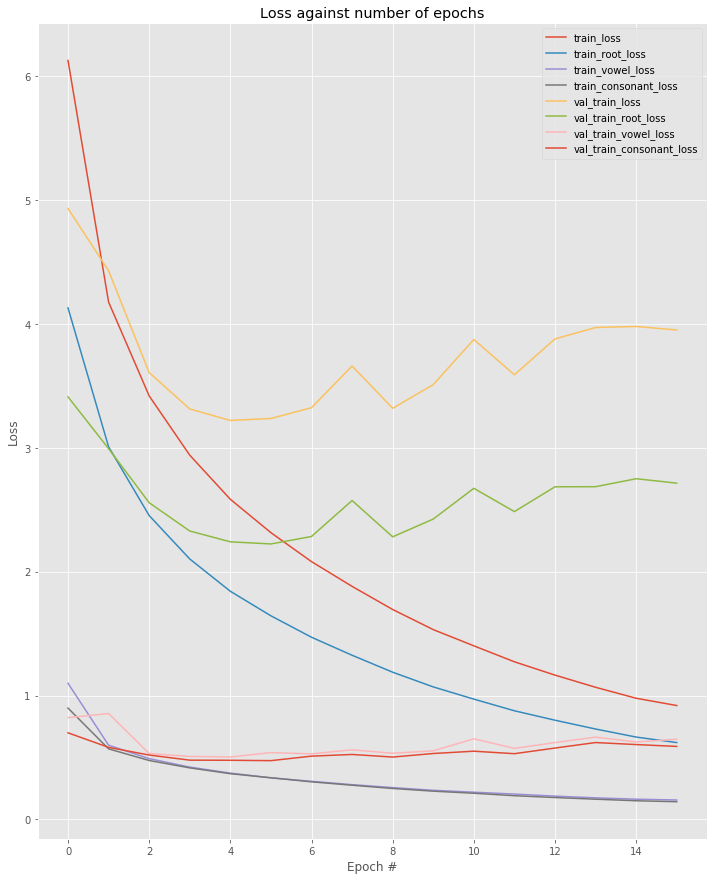

In [15]:
plot_loss(model, hist)

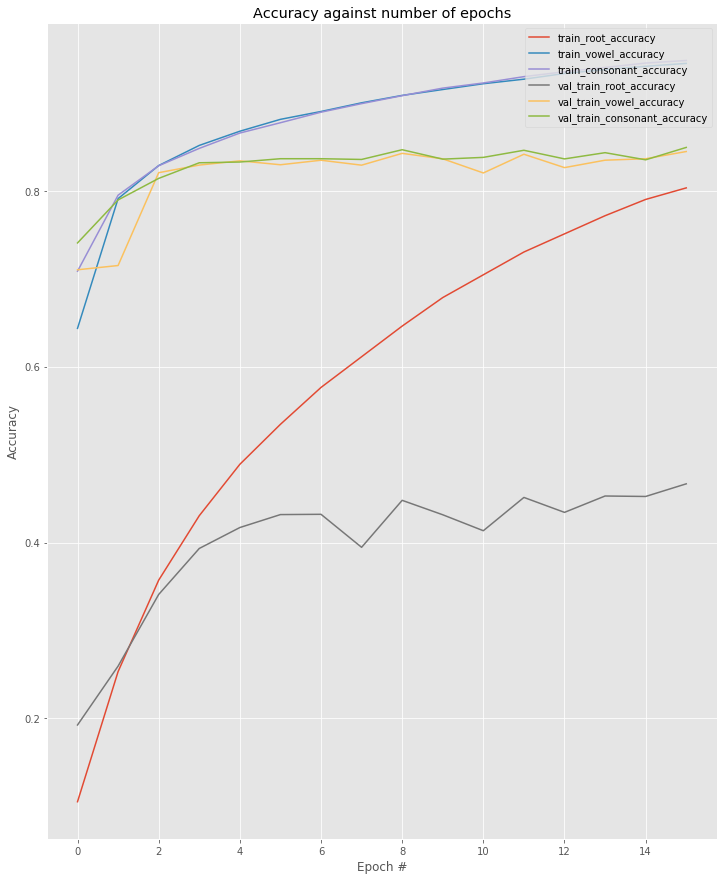

In [16]:
plot_accuracy(model, hist)

In [17]:
# model.save('model_2.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_2_history.p', 'wb'))

Model saved to disk


In [18]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [19]:
model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 16,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/16
171718/171718 [==============================] - 130s 758us/step - loss: 5.6903 - dense_9_loss: 3.9293 - dense_10_loss: 0.9458 - dense_11_loss: 0.8149 - dense_9_accuracy: 0.1191 - dense_10_accuracy: 0.6829 - dense_11_accuracy: 0.7261 - val_loss: 4.3237 - val_dense_9_loss: 3.1715 - val_dense_10_loss: 0.5854 - val_dense_11_loss: 0.5680 - val_dense_9_accuracy: 0.2173 - val_dense_10_accuracy: 0.8039 - val_dense_11_accuracy: 0.8019
Epoch 2/16
171718/171718 [==============================] - 130s 756us/step - loss: 3.5407 - dense_9_loss: 2.5600 - dense_10_loss: 0.4964 - dense_11_loss: 0.4841 - dense_9_accuracy: 0.3266 - dense_10_accuracy: 0.8269 - dense_11_accuracy: 0.8263 - val_loss: 3.6508 - val_dense_9_loss: 2.5972 - val_dense_10_loss: 0.5826 - val_dense_11_loss: 0.4714 - val_dense_9_accuracy: 0.3385 - val_dense_10_accuracy: 0.8019 - val_dense_11_accuracy: 0.8333
Epoch 3/16
171718/171718 [==============================] - 130s 

In [21]:
model.save('model_3.h5')
print('Model saved to disk')
pickle.dump(hist, open('model_3_history.p', 'wb'))

Model saved to disk


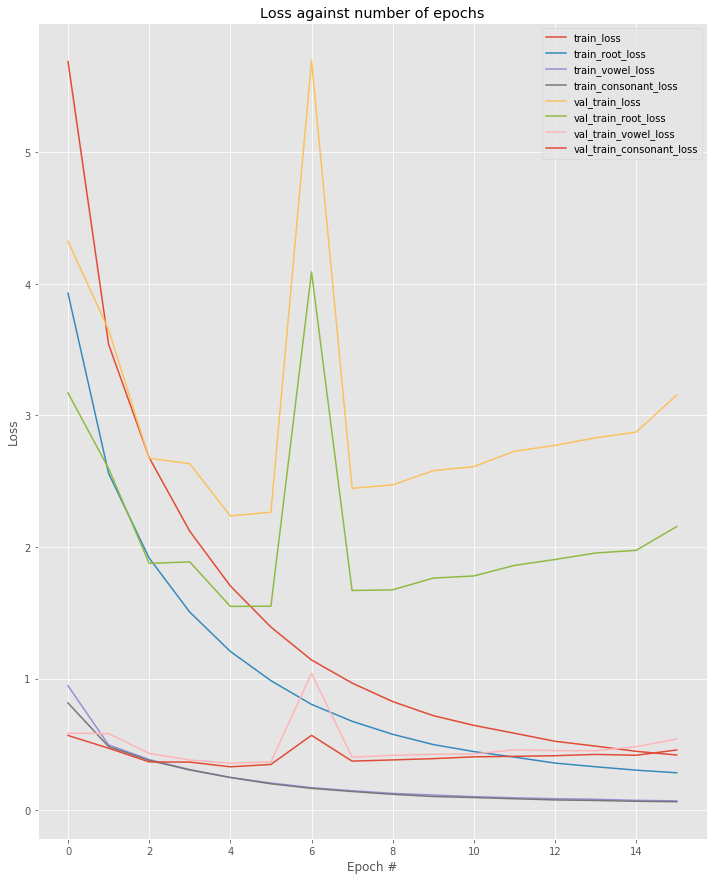

In [22]:
plot_loss(model, hist)

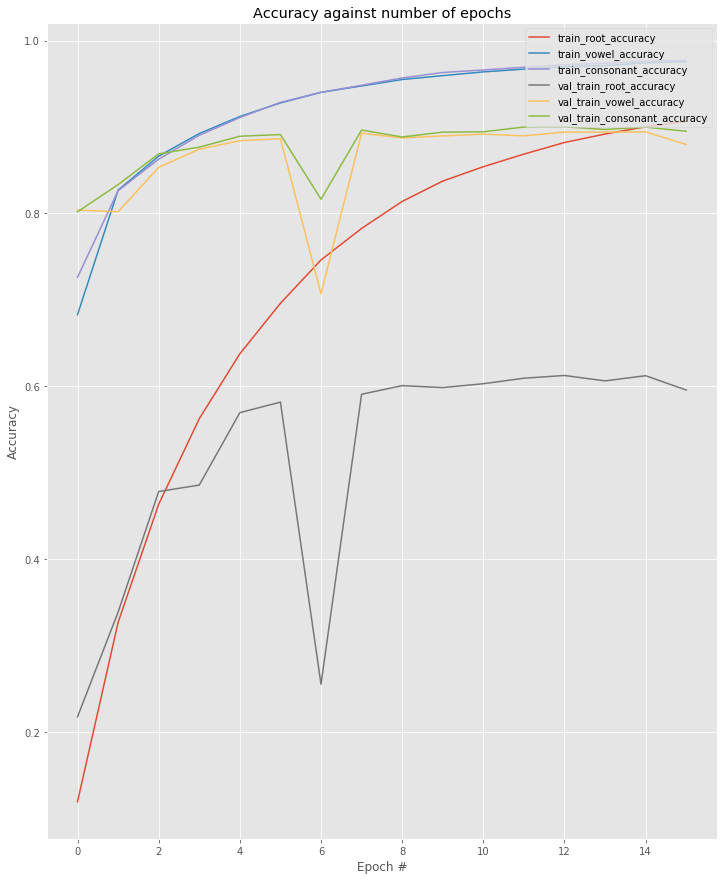

In [23]:
plot_accuracy(model, hist)

In [36]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [37]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 64, 64, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 32, 32, 32)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 32, 32, 32)   9248        max_pooling2d_7[0][0]            
____________________________________________________________________________________________

In [38]:
model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [39]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 16,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/16
171718/171718 [==============================] - 54s 315us/step - loss: 5.3598 - dense_27_loss: 3.7887 - dense_28_loss: 0.8535 - dense_29_loss: 0.7171 - dense_27_accuracy: 0.1348 - dense_28_accuracy: 0.7039 - dense_29_accuracy: 0.7516 - val_loss: 3.7329 - val_dense_27_loss: 2.7156 - val_dense_28_loss: 0.5173 - val_dense_29_loss: 0.5005 - val_dense_27_accuracy: 0.2900 - val_dense_28_accuracy: 0.8205 - val_dense_29_accuracy: 0.8188
Epoch 2/16
171718/171718 [==============================] - 53s 310us/step - loss: 3.1888 - dense_27_loss: 2.3035 - dense_28_loss: 0.4526 - dense_29_loss: 0.4326 - dense_27_accuracy: 0.3776 - dense_28_accuracy: 0.8433 - dense_29_accuracy: 0.8462 - val_loss: 2.6265 - val_dense_27_loss: 1.8714 - val_dense_28_loss: 0.4000 - val_dense_29_loss: 0.3557 - val_dense_27_accuracy: 0.4723 - val_dense_28_accuracy: 0.8589 - val_dense_29_accuracy: 0.8766
Epoch 3/16
171718/171718 [==============================] -

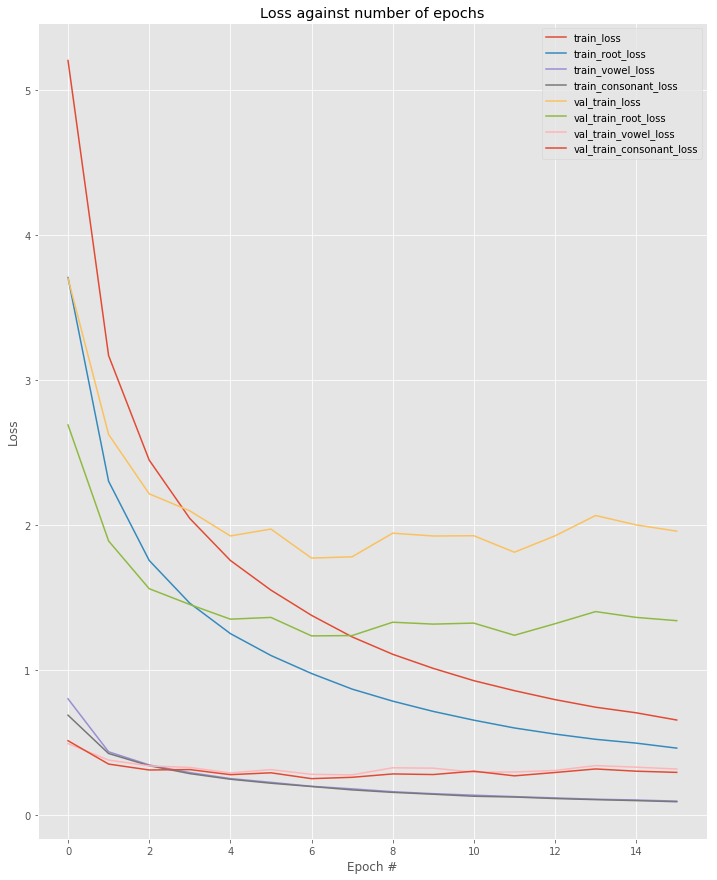

In [28]:
plot_loss(model, hist)

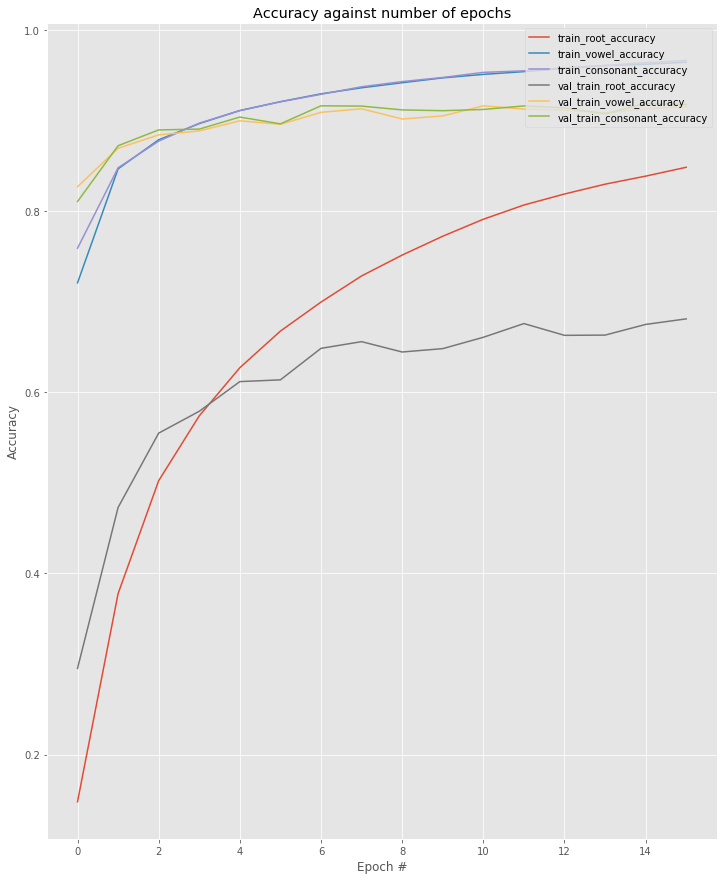

In [29]:
plot_accuracy(model, hist)

In [30]:
# increase number of epochs
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [31]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
          epochs = 64,
          batch_size= 256,
          validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/64
171718/171718 [==============================] - 53s 308us/step - loss: 3.3550 - dense_21_loss: 2.4149 - dense_22_loss: 0.4783 - dense_23_loss: 0.4618 - dense_21_accuracy: 0.3553 - dense_22_accuracy: 0.8333 - dense_23_accuracy: 0.8342 - val_loss: 2.7477 - val_dense_21_loss: 1.9578 - val_dense_22_loss: 0.4098 - val_dense_23_loss: 0.3814 - val_dense_21_accuracy: 0.4558 - val_dense_22_accuracy: 0.8611 - val_dense_23_accuracy: 0.8657
Epoch 3/64
171718/171718 [==============================] - 53s 310us/step - loss: 2.6038 - dense_21_loss: 1.8519 - dense_22_loss: 0.3806 - dense_23_loss: 0.3713 - dense_21_accuracy: 0.4800 - dense_22_accuracy: 0.8676 - dense_23_accuracy: 0.8666 - val_loss: 2.5205 - val_dense_21_loss: 1.7596 - val_dense_22_loss: 0.3895 - val_dense_23_loss: 0.3737 - val_dense_21_accuracy: 0.5034 - val_dense_22_accuracy: 0.8672 - val_dense_23_accuracy: 0.8688
Epoch 4/64
171718/171718 [==============================] -

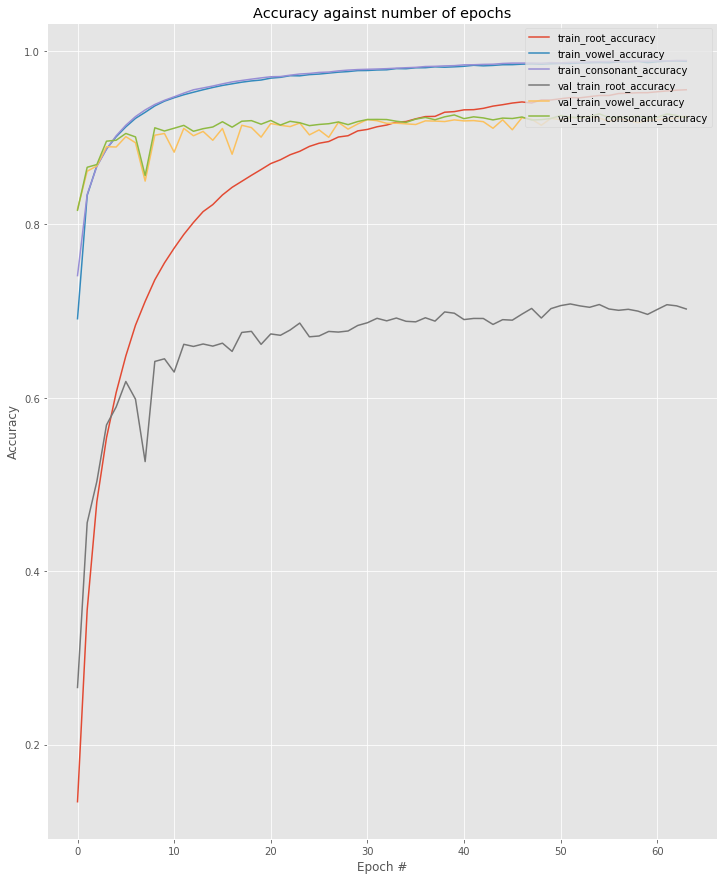

In [32]:
plot_accuracy(model, hist)

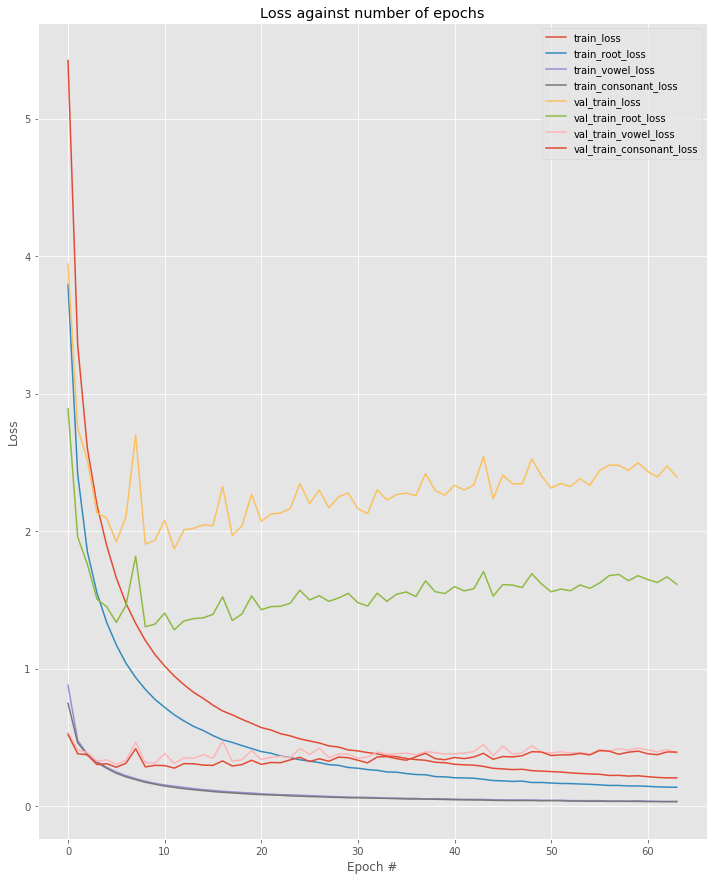

In [33]:
plot_loss(model, hist)

In [35]:
# model.save('model_4.h5')
print('Model saved to disk')
# pickle.dump(hist, open('model_4_history.p', 'wb'))

Model saved to disk
